# Linear Regression with Scikit Learn
## Problem Statement
Use model to estimate the annual medical expenditure for new customers for insurance company.
### Exercise
Ideas beforehead:

1. Dependent variable is annual medical expenditure, which is a numerical variable. Hence Linear Regression is valid.

2. As first step (part of this course) we just consider linear relationship without any interaction or quarditic terms.

3. Need to choose right set of independent variables from all possible choices.

4. Some of the possible independent variables are categorical (nominal or ordinal), need to choose a way to convert them. (Through dummy variables or possibliy convert ordinal into numerical)

5. Need to check data is clean before start of the training.
## Load Data

In [3]:
# Import packages
import pandas as pd

In [4]:
# Load data and basic information
medical_df = pd.read_csv('Data/medical.csv')
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Note that this given dataset does not have missing values.
- numerical variables: age, children, bmi, charges
- categorical variables: sex, smoker, region

Then get basic statistics:

In [10]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- For age: the max and min value are reasonable, also note that max and min are within 1 std from the first/third qutaile of the data, hence no need to change anything at this stage.
- For bmi: max value is beyond 2 std form 75%, which can be consider as potential outlier. However, it seems still reasonable.
- For children: similar to bmi.
- For charges: max value is much higher than the median value. Hence need to take attention for this when cleanning.

## Basic Analysis and Visualization

In [6]:
!pip install plotly matplotlib seaborn --quiet

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Set style and font size

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [ ]:
# medical_df.age.describe()
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Note that 18 and 19 have far more count than other ages.

### BMI

In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

Seems it is bell shape and follow normal distribution with average around 30.
BMI is a value based on body fitness, which most people are likely to have a value within certain range while age is a value that can be expected to distributed uniformally across the people.

### Charges
This is dependent variables. Hence, try to filter them with single independent variables:

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='children',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='sex',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

In [ ]:
fig = px.histogram(medical_df, x='smoker', color='sex', title='Smoker vs sex')
fig.update_layout(bargap=0.1)
fig.show()

Note that the smokers are fairly average acorss sex.

In [ ]:
fig = px.histogram(medical_df, x='smoker', color='region', title='Smoker vs region')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='smoker', color='children', title='Smoker vs children')
fig.update_layout(bargap=0.1)
fig.show()

Can conclude that distribution of sex, region and number of children are similar across smokers and non-smokers.

### Age and Charges

In [ ]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker', opacity=0.8,
                 hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

- Charges seems increase as age increase.
- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:
     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
- Smokers seems to have more 'unstable' charges if we just consider smoker and age.

### BMI and Charges

In [ ]:
fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker', opacity=0.8,
                 hover_data=['sex'], title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Same BMI, smokers appear to have more charges than non-smokers.

### Children and Charges

In [ ]:
fig = px.violin(medical_df, x='children', y='charges',
                title='Children and Charges')
fig.update_layout(bargap=0.1)
fig.show()

The number of children seems does not affect the charges very much

### Sex and Charge

In [ ]:
fig = px.violin(medical_df, x='sex', y='charges',
                title='Sex and Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Region and Charge

In [ ]:
fig = px.violin(medical_df, x='region', y='charges',
                title='Region and Charges')
fig.update_layout(bargap=0.1)
fig.show()

Similar, there seems have less relationship between charges and sex/region.

### Smoker and Charge

In [ ]:
fig = px.violin(medical_df, x='smoker', y='charges',
                title='Smoker and Charges')
fig.update_layout(bargap=0.1)
fig.show()

It is clear that non-smokers have lower average charges than smokers.

### Correlation

In [70]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [69]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

To visualize correlation matrix by heatmap:

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

Note: Correlation does not necessarily implies Causation!!!!!!

## Linear Regression (with single feature)
Want to consider age as single feature among non-smokers.

In [8]:
# first extract data to just contain non-smokers.
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
# visualize the relationship
plt.title('Age v.s. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Since in this part, just consider simple linear regression model. Have:
$$
y = ax + b
$$
and we want to determine a and b.

### Model
Guess values for a and b:
- $a = 50$
- $b = 100$
Then:

In [ ]:
def estimate_charges(age, a, b):
    return a * age + b

# guess values
a = 50
b = 100

# set up some values
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, a, b)
target = non_smoker_df.charges

# also plot the actual values as well as the estimated values
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

This line fit not well, then try another

In [61]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, a, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [ ]:
try_parameters(60, 200)

In [ ]:
try_parameters(400, 5000)

In [ ]:
try_parameters(300, 2500)

In [ ]:
try_parameters(300, -2500)

### Loss/ Cost Function
Need this to measure how well the model fit the data.
$$
RMSE = \sqrt{\frac{\sum^N_{i = 1}(Predicted_i - Actual_i)^2}{N}}
$$

In [59]:
import  numpy as np

In [64]:
def rmse(actual, predict):
    return np.sqrt(np.mean(np.square(actual - predict)))

In [65]:
a = 50
b = 100

actual = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, a, b)

rmse(actual, predicted)

8461.949562575488

update the try_parameters() function:

In [66]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    actual = non_smoker_df.charges
    predicted = estimate_charges(non_smoker_df.age, a, b)

    estimated_charges = estimate_charges(ages, a, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, actual, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(actual, predicted)
    print("RMSE Loss: ", loss)

In [ ]:
try_parameters(50, 100)

In [ ]:
try_parameters(400, 5000)

In [ ]:
try_parameters(300, -2500)

4767 is the lowest value of loss I got.
To minimize the loss is one of the way to find the best model. (LSE)

### Optimizer
Consider:
- Ordinary Least Squares
- Stochastic gradient descent

### Linear Regression using Scikit-learn

In [81]:
from  sklearn.linear_model import LinearRegression

model = LinearRegression()

# Set the training data
training_x = non_smoker_df[['age']]
y = non_smoker_df.charges

# fit the model
model.fit(training_x, y)

# get the y_hat
y_hat = model.predict(training_x)

# calculate the RMSE
print(f'The model has RMSE: {rmse(y, y_hat)}')

# print slope and intercept
print(f'The slope is: {model.coef_}')
print(f'The intercept is: {model.intercept_}')

The model has RMSE: 4662.505766636392
The slope is: [267.24891283]
The intercept is: -2091.420556565079


visualize the model:

RMSE Loss:  4662.505766636392


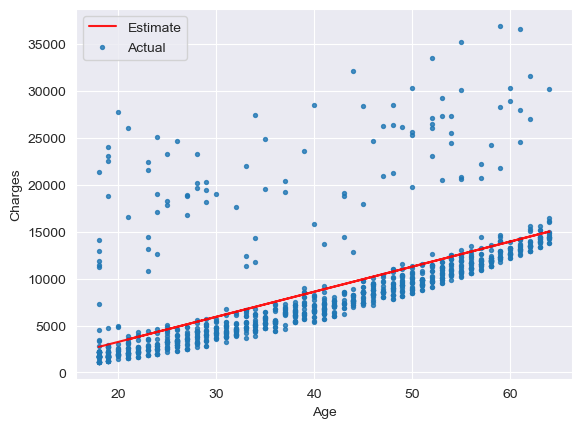

In [82]:
try_parameters(model.coef_, model.intercept_)

In [83]:
from  sklearn.linear_model import SGDRegressor

model_GD = SGDRegressor()

# fit the model
model_GD.fit(training_x, y)

# get the y_hat
y_hat_GD = model_GD.predict(training_x)

# calculate the RMSE
print(f'The model has RMSE: {rmse(y, y_hat_GD)}')

# print slope and intercept
print(f'The slope is: {model_GD.coef_}')
print(f'The intercept is: {model_GD.intercept_}')

The model has RMSE: 4962.358178444988
The slope is: [314.3767612]
The intercept is: [-5511.51290204]


RMSE Loss:  4962.358178444988


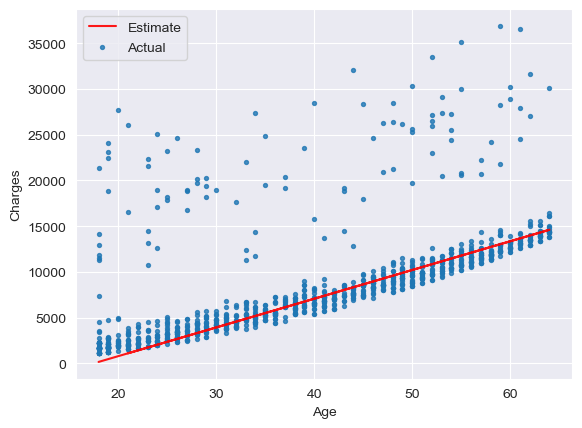

In [84]:
try_parameters(model_GD.coef_, model_GD.intercept_)

The model using stochastic gradient descent tend to fit main trend closer and less infulenced by the outliers. However, in this case, we cannot consider upper part of the dataset on plot is outlier.

In [85]:
# get data for smoker
smoker_df = medical_df[medical_df.smoker == 'yes']

In [112]:
model_smoker = LinearRegression()

# Set the training data
training_x = smoker_df[['age']]
y = smoker_df.charges

# fit the model
model_smoker.fit(training_x, y)

# get the y_hat
y_hat = model_smoker.predict(training_x)

# calculate the RMSE
print(f'The model has RMSE: {rmse(y, y_hat)}')

# print slope and intercept
print(f'The slope is: {model_smoker.coef_}')
print(f'The intercept is: {model_smoker.intercept_}')

The model has RMSE: 10711.00334810241
The slope is: [305.23760211]
The intercept is: 20294.128126915966


RMSE Loss:  10711.00334810241


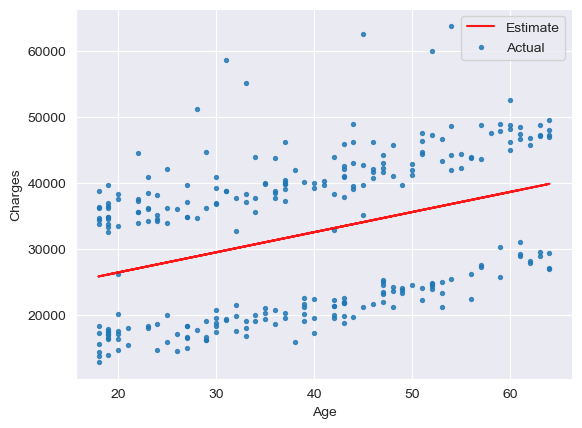

In [113]:
# update the try_parameyers() function
def try_parameters(a, b):
    ages = smoker_df.age
    actual = smoker_df.charges
    predicted = estimate_charges(smoker_df.age, a, b)

    estimated_charges = estimate_charges(ages, a, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, actual, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(actual, predicted)
    print("RMSE Loss: ", loss)

try_parameters(model_smoker.coef_, model_smoker.intercept_)

In [121]:
model_smoker_GD = SGDRegressor()

# fit the model
model_smoker_GD.fit(training_x, y)

# get the y_hat
y_hat_smoker_GD = model_smoker_GD.predict(training_x)

# calculate the RMSE
print(f'The model has RMSE: {rmse(y, y_hat_smoker_GD)}')

# print slope and intercept
print(f'The slope is: {model_smoker_GD.coef_}')
print(f'The intercept is: {model_smoker_GD.intercept_}')

The model has RMSE: 14735306.38671874
The slope is: [946743.75736703]
The intercept is: [-29789269.03601472]


RMSE Loss:  17061680060.917826


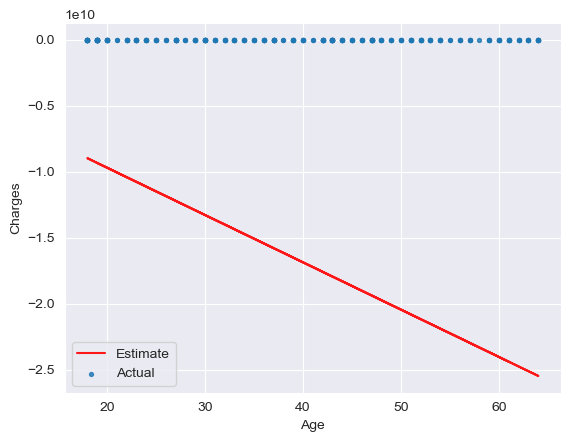

In [120]:
try_parameters(model_smoker_GD.coef_, model_smoker_GD.intercept_)

See in this case, GD doesn't work. (It give different unreasonable values each time)

### Machine Learning (ML)
Above is a ML process:
1. Model
2. Cost Function
3. Optimizer